# Домашнее задание 2 - Шмаков Владимир, Б04-105

In [1]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
from matplotlib import cm
import scipy.stats as sps
import itertools
import time

### Упражнение 1  - Генератор случайных матриц

Реализовать генератор матриц, который должен поддерживать функции:
* Генерация абсолютно случайной матрицы $n\times m$
* Генерация случайной диагональной матрицы $n\times n$
* Генерация случайной верхнетреугольной матрицы
* Генерация случайной нижнетреугольной матрицы
* Генерация симметричной матрицы
* Генерация вырожденной матрицы
* Генерация матрицы ступенчатого вида $n\times n$ ранга $m$
* Генерация возмущения матрицы $n\times m$, каждый элемент которой не превосходит по модулю заданный $\varepsilon$. Оценить величину нормы матрицы возмущений в зависимости от параметра $\varepsilon$ (оценить верхную границу).

Оценить численно вероятность того, что созданная матрица будет вырожденной для какого-либо случая выше.

In [2]:
class Matrix_generator:
    def __init__(self, raws_num: int, cols_num: int, lower_limit : int = -int(1e1), upper_limit : int = int(1e1)):
        """Класс генератора случайных матриц

        Args:
            raws_num (int): количество строк
            cols_num (int): количество колоное
            lower_limit (int, optional): нижняя грань значений элементов матрицы. Defaults to int(-1e6).
            upper_limit (int, optional): верхняя грань значений элементов матрицы. Defaults to int(1e6).
        """
        self.raws_num, self.cols_num = raws_num, cols_num
        self.lower_limit, self.upper_limit = lower_limit, upper_limit
        self.shape = (self.raws_num, self.cols_num)
    def random(self) -> np.ndarray:
        """Генерирует абсолютно случаную матрицу заданного размера

        Returns:
            np.ndarray: случайная матрица
        """
        return np.random.random((self.raws_num, self.cols_num)) * self.lower_limit + np.random.random((self.raws_num, self.cols_num)) * self.upper_limit 
    def diagonal(self) -> np.ndarray:
        """Генерирует случайную диагональную матрицу

        Returns:
            np.ndarray: диагональная матрица
        """
        diagonal_values = np.random.random(np.min(self.shape)) * self.lower_limit + np.random.random(np.min(self.shape)) * self.upper_limit
        result = np.zeros(self.shape)
        np.fill_diagonal(result, diagonal_values)
        return result
    def upper_diagonal(self) -> np.ndarray:
        """Случайная верхнедиоганальная матрица

        Returns:
            np.ndarray: верхнедиоганальная матрица
        """
        return np.triu(self.random())
    def lower_diagonal(self) -> np.ndarray:
        """Случайная нижнедиоганальная матрица

        Returns:
            np.ndarray: нижнедиоганальная матрица
        """
        return np.tril(self.random())
    def symmetrix(self) -> np.ndarray:
        """Случайная симметричная матрица

        Raises:
            ValueError: Количество строк и столбцов должно совпадать

        Returns:
            np.ndarray: симметричная матрица
        """
        if self.cols_num - self.raws_num:
            raise ValueError("Не могу создать неквадратную симметричную матрицу")
        a = self.random()
        return (a + a.T) / 2
    def singular(self) -> np.ndarray:
        """Случайная вырожденная матрица

        Returns:
            np.ndarray: вырожденная матрица
        """
        if self.cols_num - self.raws_num:
            raise ValueError("Количество строк и столбцов должно совпадать")
        a = self.random()
        linear_combination_raw_index = np.random.randint(low = 0, high = self.raws_num ) 
        a_without_raw = np.vstack([a[:linear_combination_raw_index, :], a[linear_combination_raw_index+1:,]]) / self.upper_limit
        a[linear_combination_raw_index] = np.sum(a_without_raw, axis = 0)
        return a
    def singular_with_zero_raw(self) -> np.ndarray:
        """Генерирует вырожденную матрицу путем зануления строки

        Returns:
            np.ndarray: случайная матрица с нулевой строкой
        """
        if self.cols_num - self.raws_num:
            raise ValueError("Количество строк и столбцов должно совпадать")
        a = self.random()
        null_raw_index = np.random.randint(low = 0, high = self.raws_num ) 
        a[null_raw_index] = np.zeros(self.cols_num)
        return a
    def step(self, rang: int) -> np.ndarray:
        """Генерация ступенчатой матрицы ранга m

        Args:
            rang (int): Ранг ступенчатой матрицы

        Returns:
            np.ndarray: Ступенчатая матрица
        """
        if self.cols_num - self.raws_num:
            raise ValueError("Количество строк и столбцов должно совпадать")
        A = np.random.random(size=(self.raws_num, self.cols_num))
        for i in range(self.raws_num):
                for j in range(self.cols_num):
                    if (i - 1 >= j) or (j >= rang):
                        A[i, j] = 0
        

##### Оценка нормы матрицы возмущений в зависимости от величины верхней границы

In [3]:
N, M = 111, 200
exp_num = 50
disturbance_generator = Matrix_generator(N, N)
norm_max, norm_min = [], []
norm_mean = []
eps = np.linspace(0, 1000, 100)
for e in eps:
    disturbance_generator = Matrix_generator(N, N, lower_limit = -e, upper_limit = e)
    norm_values = [np.linalg.norm(disturbance_generator.random()) for _ in range(exp_num)]
    norm_min.append(np.min(norm_values))
    norm_max.append(np.max(norm_values))
    norm_mean.append(np.mean(norm_values))

Text(0.5, 1.0, 'Зависимость нормы матрицы от параметра $\\epsilon$')

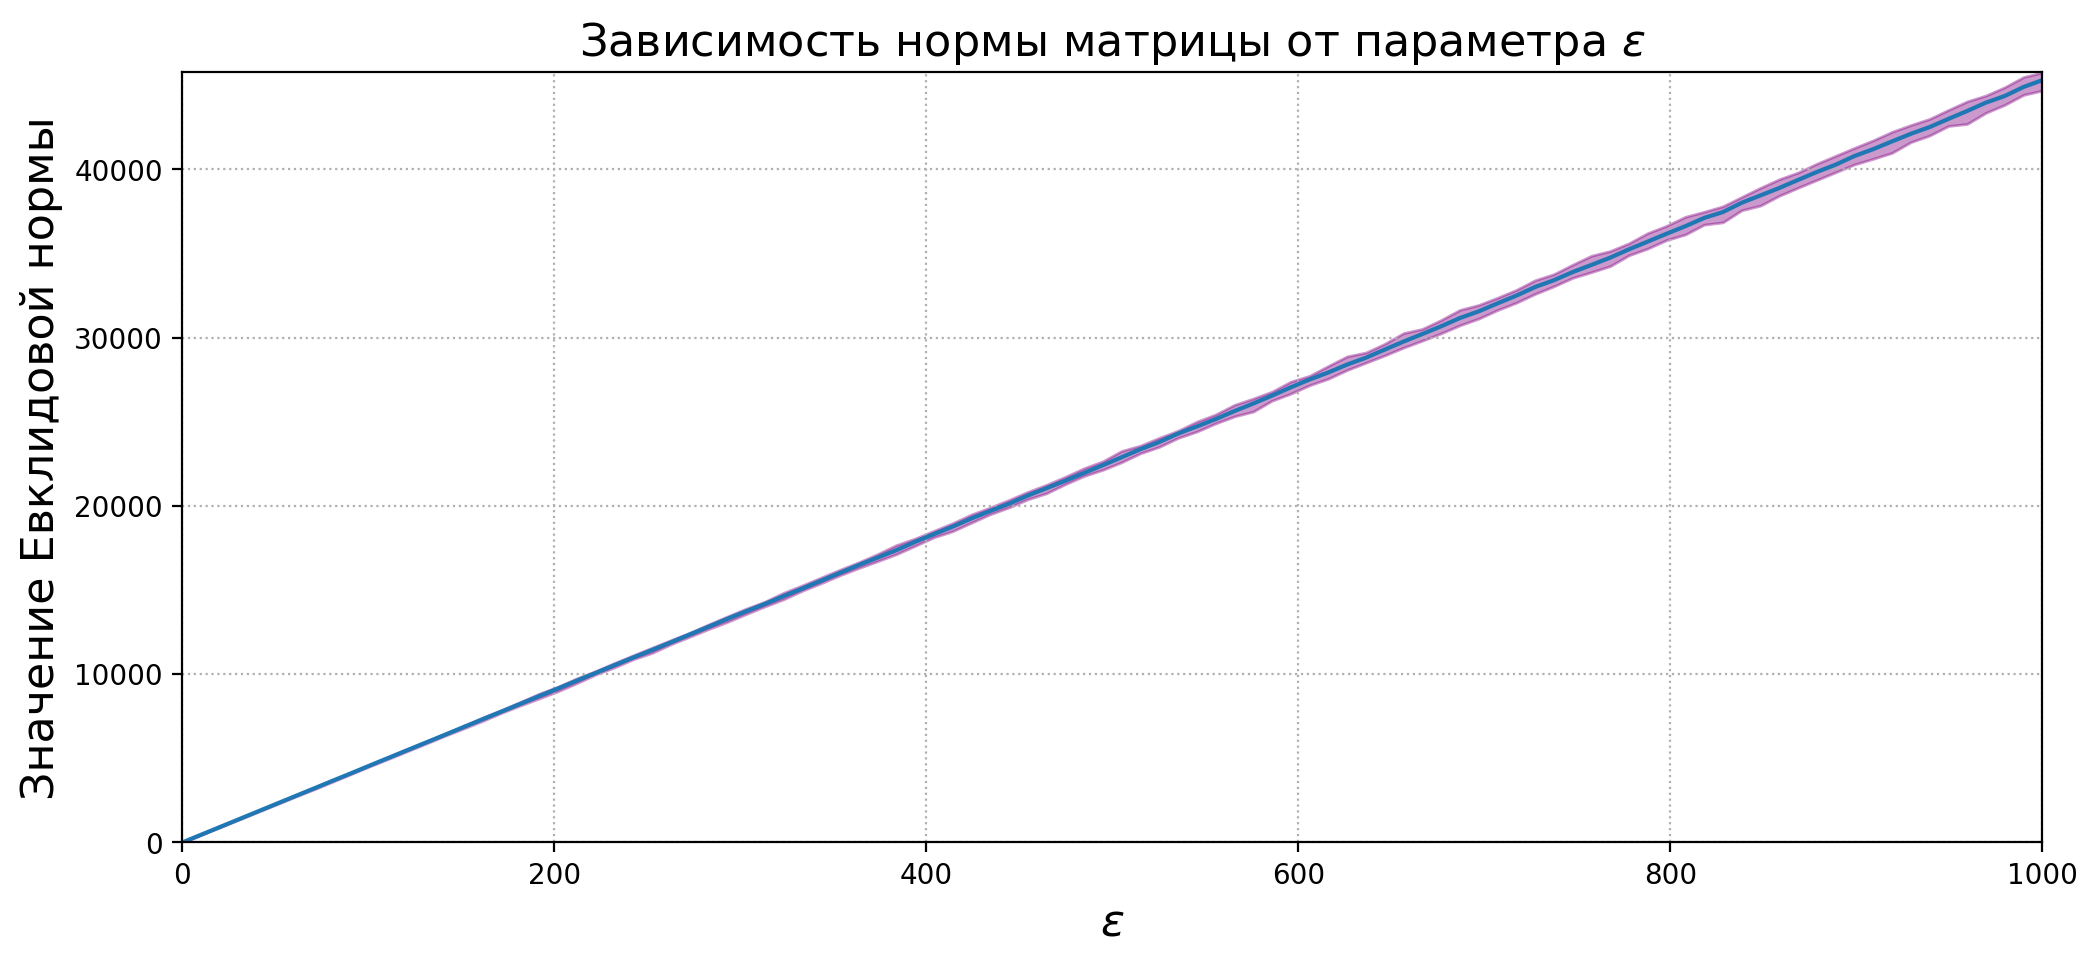

In [4]:
plt.figure(figsize = (12, 5), dpi = 200)

plt.plot(eps, norm_mean)
plt.fill_between(eps, norm_min, norm_max, color = 'purple', alpha = 0.4)
plt.xlabel("$\epsilon$", fontsize = 16)
plt.ylabel("Значение Евклидовой нормы", fontsize = 16)
plt.grid(ls = ':')
plt.xlim(0, 1000)
plt.ylim(0, np.max(norm_max))
plt.title("Зависимость нормы матрицы от параметра $\epsilon$", fontsize = 16)

##### Оценка вероятности появления вырожденной матрицы при генерации случайной симметричной

In [5]:
generator = Matrix_generator(5, 5)
det_values = np.array([np.linalg.det(generator.symmetrix()) for _ in range(10000)])

Вероятность сгенерировать вырожденную матрицу:  0.0001


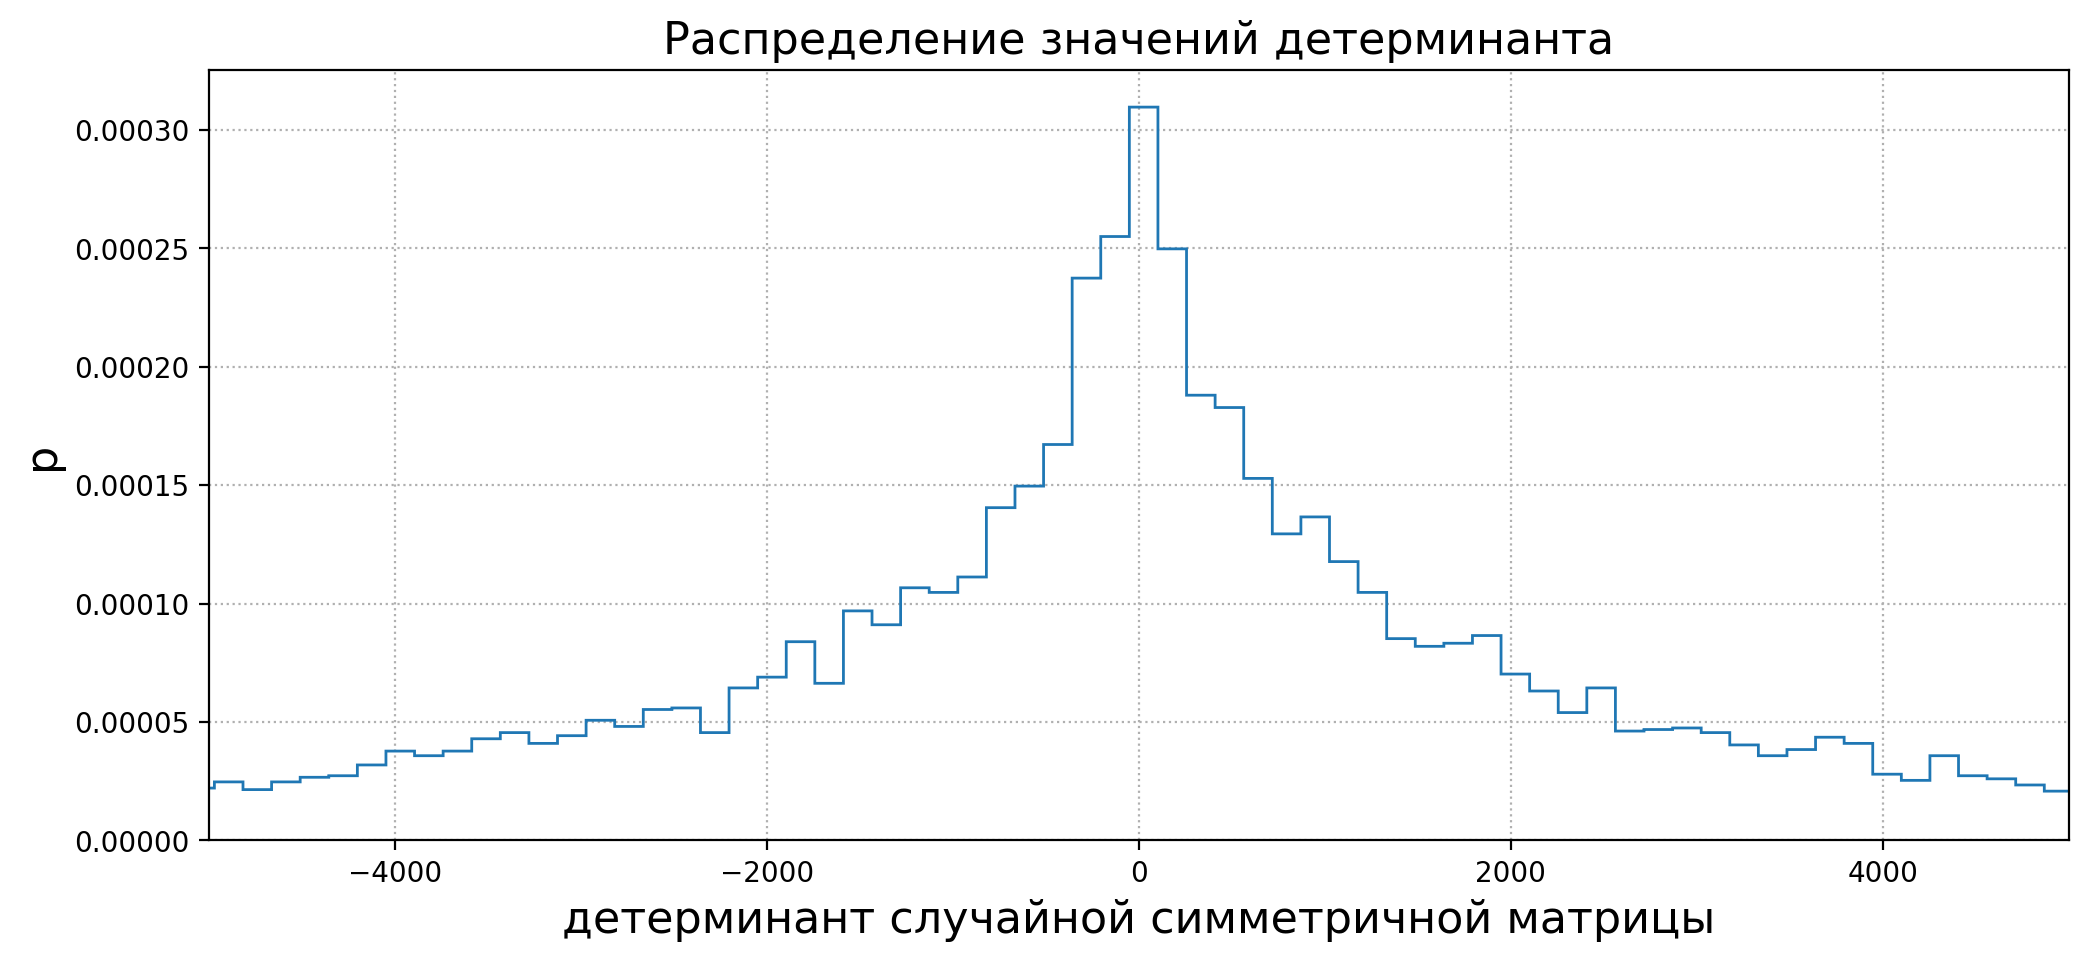

In [6]:
plt.figure(figsize = (12, 5), dpi = 200)
plt.hist(det_values, bins = 1000, density = True, histtype = 'step')
plt.xlim(-5000, 5000)
plt.xlabel("детерминант случайной симметричной матрицы", fontsize = 16)
plt.ylabel("p", fontsize = 16)
plt.grid(ls = ':')
plt.title("Распределение значений детерминанта", fontsize = 16)
is_sing = 1e-1
print("Вероятность сгенерировать вырожденную матрицу: ", np.sum(np.abs(det_values) < is_sing) / det_values.shape[0])

### Упражнение 2 - Вычисление матричных норм

Реализовать вычисление трех основных норм векторов (L1, L2 и максимальную) и подчиненных им матричных норм. Реализовать вычисление числа обусловленности.

Примечание: для вычисления собственных значений можно использовать linalg.eigvals из модуля scipy.

In [27]:
def L1(a: np.ndarray) -> np.float64:
    """Вычисляет манхетанскую норму

    Args:
        a (np.ndarray): Вектор или матрица. В случае матрицы будет вычислена норма подчинённая к l1

    Returns:
        np.float64: l1 норма
    """
    if len(a.shape) == 1:
        return np.sum(np.abs(a))
    return np.max(np.sum(np.abs(a), axis = 0))

def L2(a: np.ndarray) -> np.float64:
    """Вычисление Евклидовой нормы

    Args:
        a (np.ndarray):  Вектор или матрица. В случае матрицы будет вычислена норма подчинённая к l2

    Returns:
        np.float64: l2 норма
    """
    if len(a.shape) == 1:
        return np.sqrt(np.sum(np.power(a, 2)))
    return np.sqrt(np.max(np.linalg.eigvals(a.T @ a)))

def LInf(a: np.ndarray) -> np.float64:
    """Вычисление максимальной нормы

    Args:
        a (np.ndarray): Вектор или матрица. В случае матрицы будет вычислена норма подчинённая к linf

    Returns:
        np.float64: linf норма
    """
    if len(a.shape) == 1:
        return np.max(np.abs(a))
    return np.max(np.sum(np.abs(a), axis = 1)) 

def L1_condition_number(a: np.ndarray) -> np.float64:
    """Вычисление числа обусловленности при использовании нормы L2

    Args:
        a (np.ndarray): матрица

    Returns:
        np.float64: число обусловленности
    """
    eigenvalues = np.linalg.eigvals(a.T @ a)
    return np.sqrt(np.max(eigenvalues) / np.min(eigenvalues))

Проверим, верно ли работает реализация

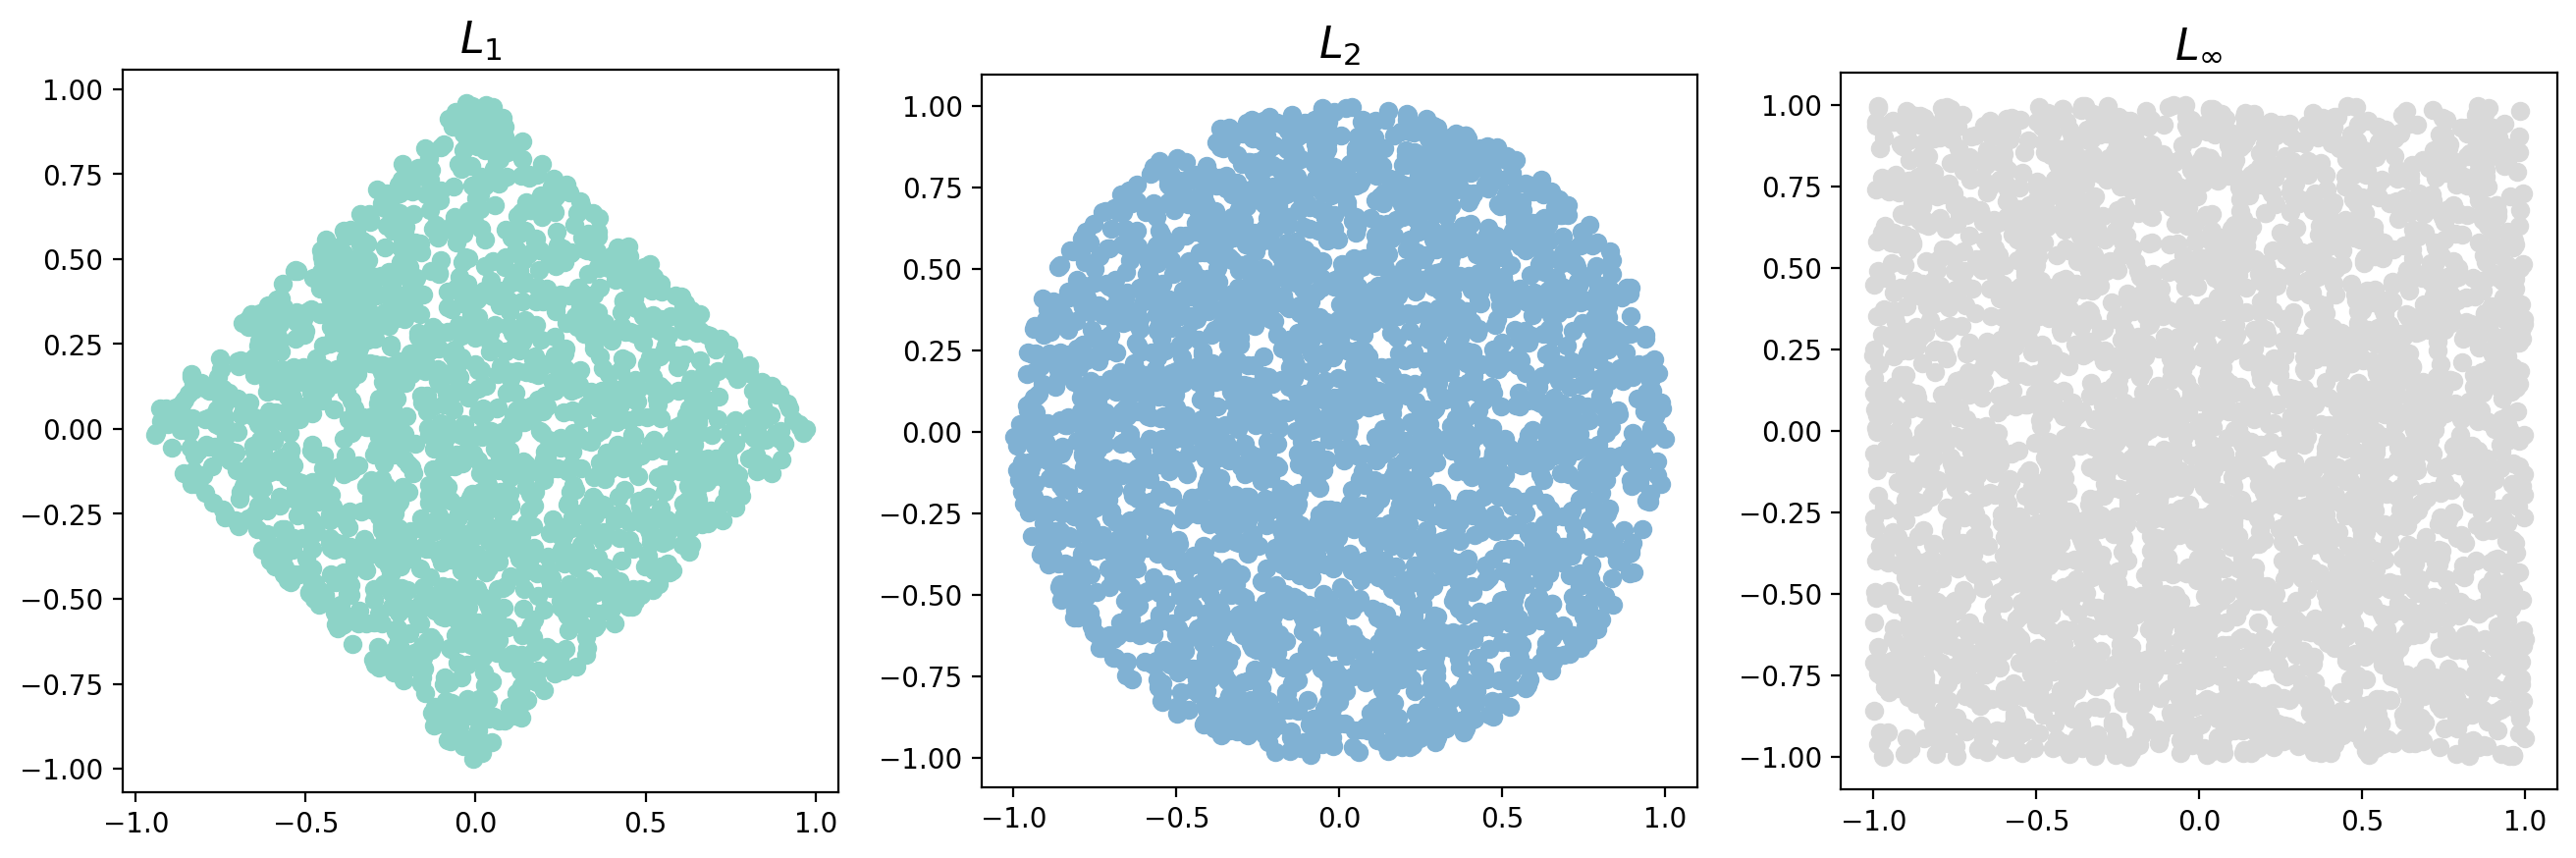

In [28]:
generator = Matrix_generator(2, 1, lower_limit = -10, upper_limit = 10)
norms = [L1, L2, LInf]
norm_names = [r'$L_1$', r'$L_2$', r'$L_{\infty}$']
point_number = int(1e5)
fig, ax = plt.subplots(1, 3, figsize = (16, 10), dpi = 200)
for ind, (plotable, norm, name) in enumerate(zip(ax, norms, norm_names)):
    points_x, points_y = [], []
    for _ in range(point_number):
        vec = generator.random()
        if norm(vec) < 1:
            points_y.append(vec[1])
            points_x.append(vec[0])
    plotable.scatter(points_x, points_y, color = cm.Set3(ind / 3))
    plotable.set_aspect('equal')
    plotable.set_title(name, fontsize = 16)

In [29]:
generator = Matrix_generator(3, 3)
matrix = generator.random()

print(np.allclose(L1(matrix), np.linalg.norm(matrix, ord = 1)))
print(np.allclose(L2(matrix), np.linalg.norm(matrix, ord = 2)))
print(np.allclose(LInf(matrix), np.linalg.norm(matrix, ord = np.inf)))

True
True
True


### Упражнение 1 *

Реализовать пункты из упражнения один. Но теперь генерировать хорошо обусловленные матрицы.

In [9]:
class Good_matrix_generator:
    def __init__(self, raws_num: int, cols_num: int, lower_limit : int = -int(1e1), upper_limit : int = int(1e1), max_singular_val :int = 10):
        """Класс генератора случайных матриц

        Args:
            raws_num (int): количество строк
            cols_num (int): количество колоное
            lower_limit (int, optional): нижняя грань значений элементов матрицы. Defaults to int(-1e6).
            upper_limit (int, optional): верхняя грань значений элементов матрицы. Defaults to int(1e6).
            max_singular_val (float, optional): Максимально возможно значение сингулярного числа 
        """
        self.raws_num, self.cols_num = raws_num, cols_num
        self.lower_limit, self.upper_limit = lower_limit, upper_limit
        self.shape = (self.raws_num, self.cols_num)
        self.max_singular_val = max_singular_val
    def __random_normed__(self) -> np.ndarray:
        """Генерирует абсолютно случаную матрицу заданного размера

        Returns:
            np.ndarray: случайная матрица
        """
        U, V = sps.unitary_group.rvs(self.raws_num), sps.unitary_group.rvs(self.cols_num)
        singular_values = np.random.random(np.min([self.raws_num, self.cols_num])) * self.max_singular_val
        sigma = np.zeros(self.shape)
        np.fill_diagonal(sigma, singular_values)
        result = U @ sigma @ V
        max_value = np.abs(np.max(np.max(result)))
        return (result / max_value)
    def random(self) -> np.ndarray:
        """Генерирует абсолютно случаную матрицу заданного размера

        Returns:
            np.ndarray: случайная матрица
        """
        return self.__random_normed__() * self.upper_limit + self.__random_normed__() * self.lower_limit
    def diagonal(self) -> np.ndarray:
        """Генерирует случайную диагональную матрицу

        Returns:
            np.ndarray: диагональная матрица
        """
        singular_values = np.random.random(np.min([self.raws_num, self.cols_num])) * self.max_singular_val
        result = np.zeros(self.shape)
        np.fill_diagonal(result, singular_values)
        return result
    def upper_diagonal(self) -> np.ndarray:
        """Случайная верхнедиоганальная матрица

        Returns:
            np.ndarray: верхнедиоганальная матрица
        """
        return np.triu(self.random())
    def lower_diagonal(self) -> np.ndarray:
        """Случайная нижнедиоганальная матрица

        Returns:
            np.ndarray: нижнедиоганальная матрица
        """
        return np.tril(self.random())
    def symmetrix(self) -> np.ndarray:
        """Случайная симметричная матрица

        Raises:
            ValueError: Количество строк и столбцов должно совпадать

        Returns:
            np.ndarray: симметричная матрица
        """
        if self.cols_num - self.raws_num:
            raise ValueError("Не могу создать неквадратную симметричную матрицу")
        a = self.random()
        return (a + a.T) / 2
    def singular(self) -> np.ndarray:
        """Случайная вырожденная матрица

        Returns:
            np.ndarray: вырожденная матрица
        """
        if self.cols_num - self.raws_num:
            raise ValueError("Количество строк и столбцов должно совпадать")
        a = self.random()
        linear_combination_raw_index = np.random.randint(low = 0, high = self.raws_num ) 
        a_without_raw = np.vstack([a[:linear_combination_raw_index, :], a[linear_combination_raw_index+1:,]]) / self.upper_limit
        a[linear_combination_raw_index] = np.sum(a_without_raw, axis = 0)
        return a
    def singular_with_zero_raw(self) -> np.ndarray:
        """Генерирует вырожденную матрицу путем зануления строки

        Returns:
            np.ndarray: случайная матрица с нулевой строкой
        """
        if self.cols_num - self.raws_num:
            raise ValueError("Количество строк и столбцов должно совпадать")
        a = self.random()
        null_raw_index = np.random.randint(low = 0, high = self.raws_num ) 
        a[null_raw_index] = np.zeros(self.cols_num)
        return a
    def step(self, rang: int) -> np.ndarray:
        """Генерация ступенчатой матрицы ранга m

        Args:
            rang (int): Ранг ступенчатой матрицы

        Returns:
            np.ndarray: Ступенчатая матрица
        """
        if self.cols_num - self.raws_num:
            raise ValueError("Количество строк и столбцов должно совпадать")
        

In [10]:
good_generator, bad_generator = Good_matrix_generator(4, 4), Matrix_generator(4, 4)
experiment_num = 100000



condition_numbers_good = np.array([L1_condition_number(good_generator.random()) for _ in range(experiment_num)])
condition_numbers_bad = np.array([L1_condition_number(bad_generator.random()) for _ in range(experiment_num)])



(0.0, 100.0)

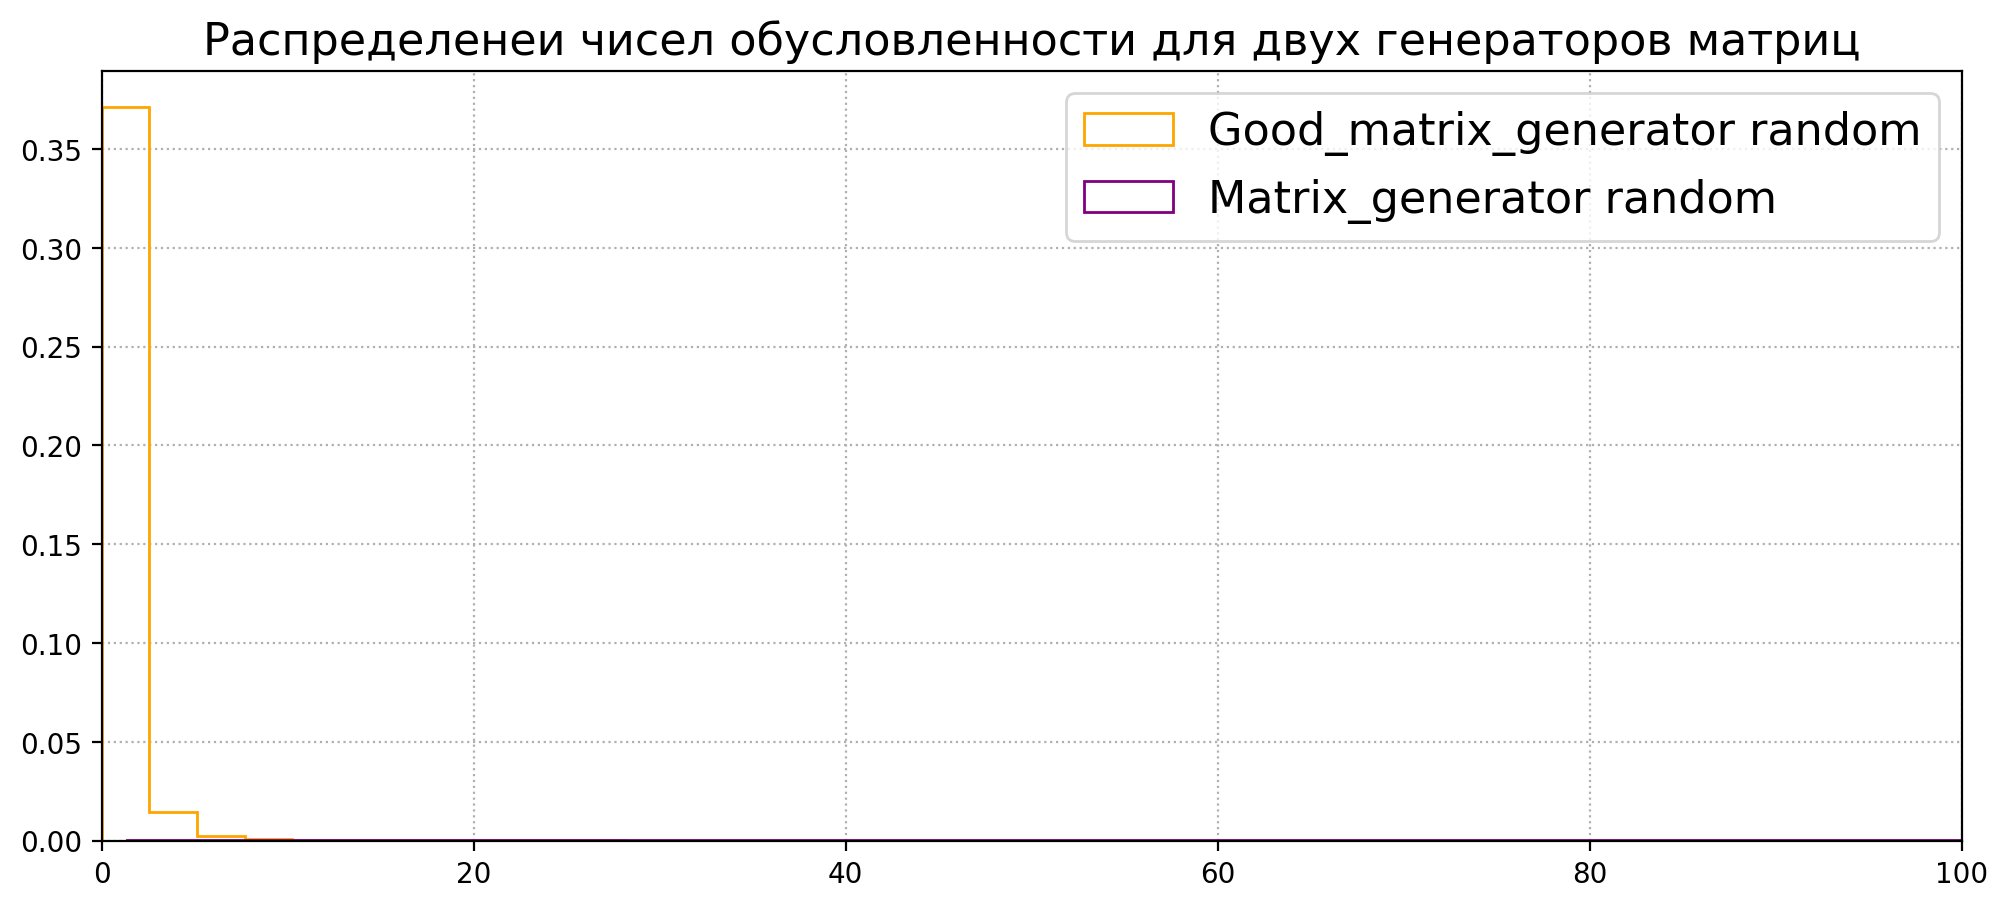

In [11]:
plt.figure(figsize = (12, 5), dpi = 200)
plt.hist(np.abs(condition_numbers_good), color = 'orange', histtype = 'step', label = 'Good_matrix_generator random', bins = 100, density = True)
plt.hist(np.abs(condition_numbers_bad), color = 'purple', histtype = 'step', label = 'Matrix_generator random', bins = 100, density = True)
plt.grid(ls = ':')
plt.legend(fontsize = 16)
plt.title("Распределенеи чисел обусловленности для двух генераторов матриц", fontsize = 16)
plt.xlim(0, 100)

### Задача 6

Рассмотрим функцию, отображающую шесть тензоров на один тензор: $Z\left(\lambda^{(1)}, \lambda^{(2)}, \lambda^{(3)}, \Gamma^{(1)}, \Gamma^{(2)}, U\right)$ :


$$
Z_{a h i j}=\sum_{b c d e f g} \lambda^{(1)}{ }_{a b} \Gamma_{c b d}^{(1)} \lambda^{(2)}{ }_{d e} \Gamma_{f e g}^{(2)} \lambda_{g h}^{(3)} U_{i j c f}
$$

редположив, что все индексы пробегают значения от 1 до χ, проведите эксперимент и сравните скорость
различных реализаций функции Z. Исследуйте значения χ в диапазоне 3–50.


- В файле convolution. ipynb вы можете найти релизацию глупого способа вычисления этой свертки, который требует $\chi^4 \times \chi^6=\chi^{10}$ операций. На самом деле это можно вычислить гораздо быстрее!
- С помощью функции numpy . einsum (нужно использовать аргумент optimize), можно добиться намного большей производительности. Чтобы понять, что происходит под капотом, воспользуйтесь функцией numpy.einsum_path. Какое минимальное количество операций требуется для вычисления $Z$ ?
- Посмотрев на вывод функции numpy.einsum_path, peализуйте алгоритм для вычисления $Z$, который столь же эффективен, как numpy.einsum, но использует более элементарные numpy.dot и numpy.tensor_dot.

In [12]:
c = 3
lambda1 = np.random.normal(size=(c, c))
lambda2 = np.random.normal(size=(c, c))
lambda3 = np.random.normal(size=(c, c))
G1 = np.random.normal(size=(c, c, c))
G2 = np.random.normal(size=(c, c, c))
U = np.random.normal(size=(c, c, c, c))

In [13]:
def Z_naive(lambda1, lambda2, lambda3, G1, G2, U):
    c = lambda1.shape[0]
    Z = np.zeros(shape=(c, c, c, c))
    for a, b, c, d, e, f, g, h, i, j in itertools.product(*([range(c)]*10)):
        Z[a, h, i, j] += lambda1[a, b]*lambda2[d, e]*lambda3[g, h]*G1[c, b, d]*G2[f, e, g]*U[i, j, c, f]
    return Z

def Z_einsum(lambda1, lambda2, lambda3, G1, G2, U, optimization_method):
    return np.einsum('ab,cbd,de,feg,gh,ijcf->ahij', lambda1, G1, lambda2, G2, lambda3, U, optimize = optimization_method)




$$
Z_{a h i j}=\sum_{b c d e f g} \lambda^{(1)}{ }_{a b} \Gamma_{c b d}^{(1)} \lambda^{(2)}{ }_{d e} \Gamma_{f e g}^{(2)} \lambda_{g h}^{(3)} U_{i j c f}
$$

__Проверка корректности работы. Сравнение результатов__

In [14]:
Z = Z_naive(lambda1, lambda2, lambda3, G1, G2, U)
Z_einsum_gredy = Z_einsum(lambda1, lambda2, lambda3, G1, G2, U, 'greedy')


In [15]:
print(np.allclose(Z_einsum_gredy, Z))

True


__Скорость работы при различных оптичизациях__

In [16]:
methods = [True, 'greedy', 'optimal']
result = {m: [] for m in methods}
result = result | {f'{m}_down': [] for m in methods}
result = result | {f'{m}_up': [] for m in methods}
experiment_num, size_values = 5, np.arange(5, 80, 5).astype(np.int64)
for method in methods:
    print(method)
    for c in size_values:
        op_result = []
        for _ in range(experiment_num):
            lambda1 = np.random.normal(size=(c, c))
            lambda2 = np.random.normal(size=(c, c))
            lambda3 = np.random.normal(size=(c, c))
            G1 = np.random.normal(size=(c, c, c))
            G2 = np.random.normal(size=(c, c, c))
            U = np.random.normal(size=(c, c, c, c))
            now_time = time.perf_counter_ns()
            Z_einsum(lambda1, lambda2, lambda3, G1, G2, U, method)
            op_time = time.perf_counter_ns() - now_time
            op_result.append(op_time)
        result[method].append(np.mean(op_result) / 1e9)
        result[f'{method}_down'].append(np.min(op_result) / 1e9)
        result[f'{method}_up'].append(np.max(op_result)  / 1e9)

True
greedy
optimal


Text(0.5, 1.0, 'Время выполнения в зависимости от размера оси тензора')

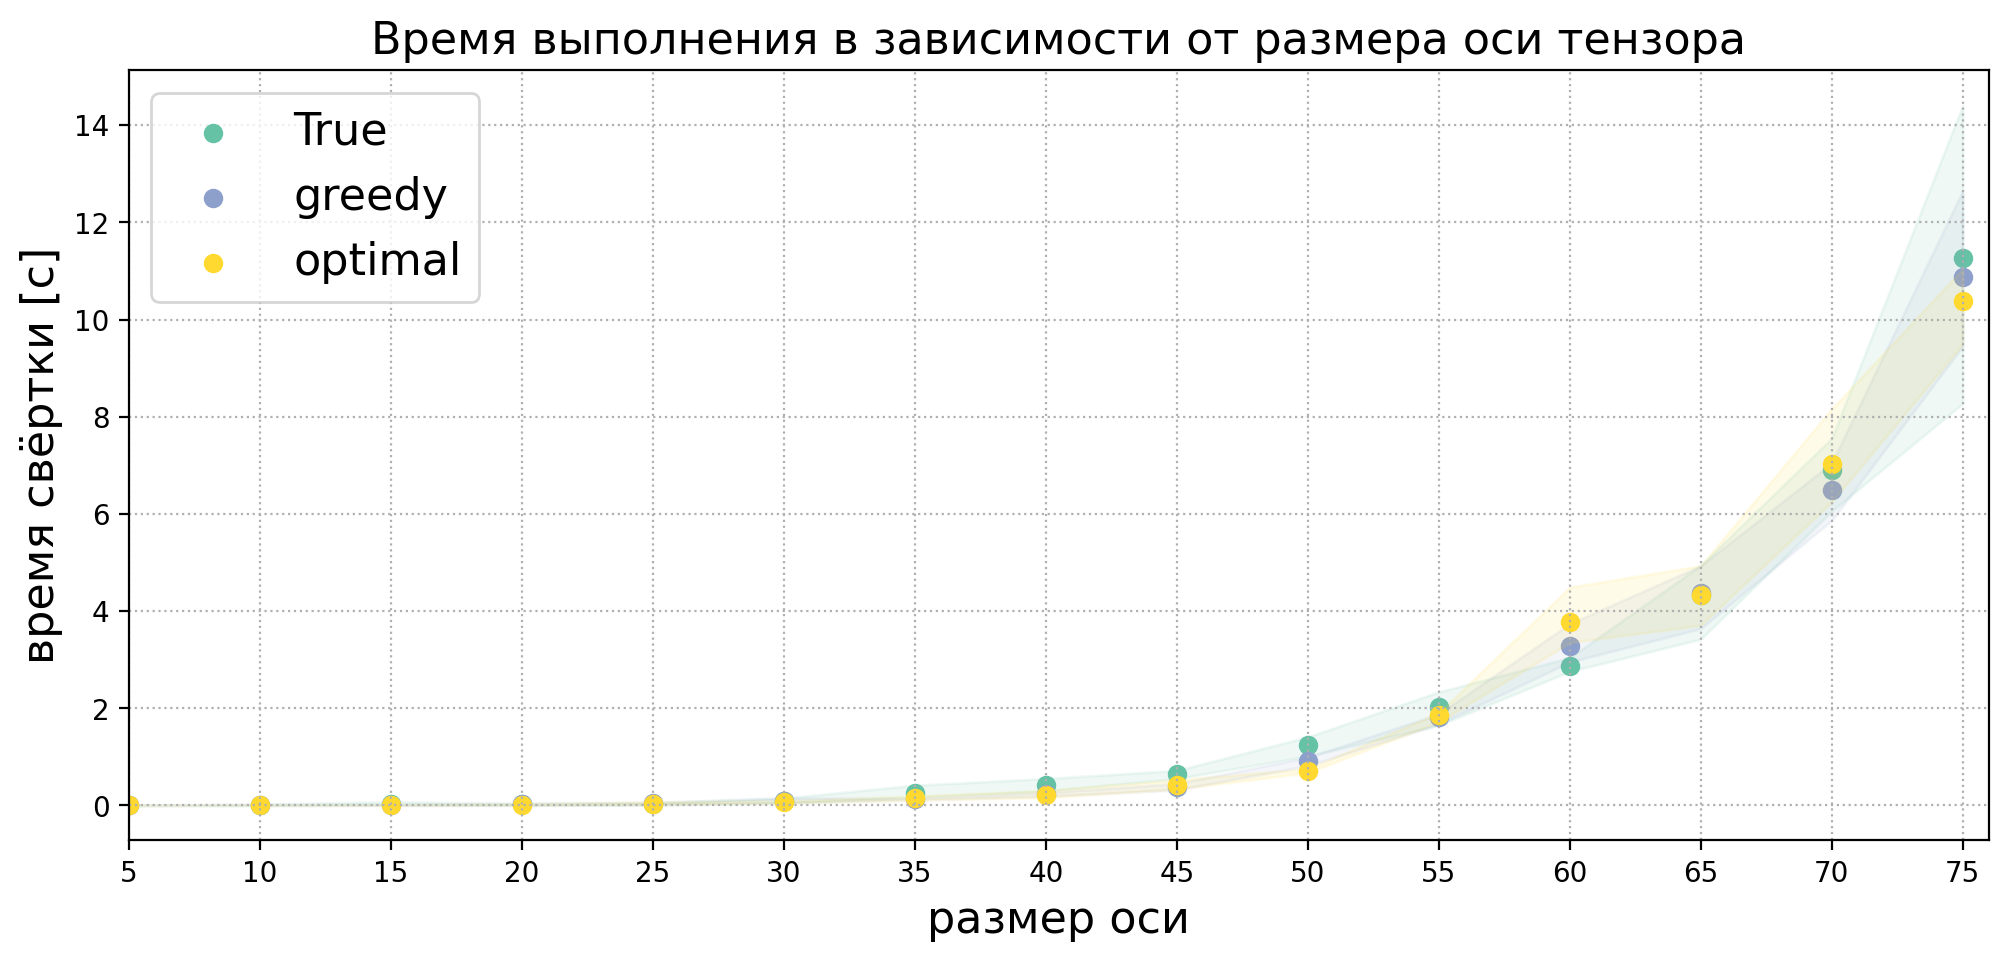

In [30]:
plt.figure(figsize = (12, 5), dpi = 200)

for ind, method in enumerate(methods):
    color = cm.Set2(ind / len(methods))
    plt.scatter(size_values, result[method], color = color, label = str(method))
    plt.fill_between(size_values, result[f'{method}_down'], result[f'{method}_up'], color = color, alpha = 0.1)

plt.xlabel("размер оси", fontsize = 16)
plt.ylabel("время свёртки [c]", fontsize = 16)
plt.legend(fontsize = 16)
plt.grid(ls = ':')
plt.xticks(size_values)
plt.xlim(5, 76)
plt.title("Время выполнения в зависимости от размера оси тензора", fontsize = 16)

__Создание собственного метода__

In [52]:
path, _ = np.einsum_path('ab,cbd,de,feg,gh,ijcf->ahij', lambda1, G1, lambda2, G2, lambda3, U, optimize = 'greedy')
path = path[1:]
print(path)


[(0, 1), (0, 1), (0, 3), (1, 2), (0, 1)]


In [53]:
result = np.tensordot(lambda1, G1, axes = path[0])
tensors = [G1, lambda2, G2, lambda3, U]
for p, t in zip(path[1:], tensors[1:]):
    print(p)
    result = np.tensordot(result, t, axes = p)

(0, 1)
(0, 3)


IndexError: tuple index out of range